<a href="https://colab.research.google.com/github/henrik3141/henrik3141.github.io/blob/master/MML_Lecture2_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mathematics for Machine Learning Lecture 2: Linear Regression & Some Linear Algebra

The following gives a simple example of Linear regression with just one feature. We start by visualizing the training set.


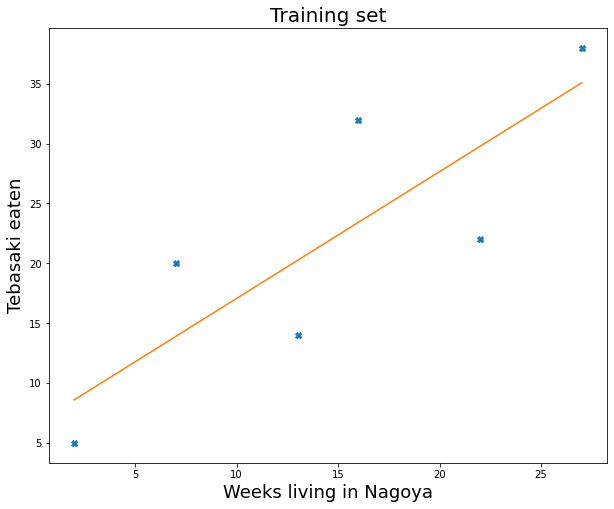

In [318]:
# Comments with #
import numpy as np  # For doing math 
from matplotlib import pyplot as plt  # For plotting 

# Training set
Tx = np.array([2, 7, 13, 16, 22, 27])
Ty = np.array([5, 20, 14, 32, 22, 38])

# Draw the Training set
plt.figure(figsize=(10,8))
plt.plot(Tx,Ty,'X')
plt.title("Training set", fontsize =20)
plt.xlabel("Weeks living in Nagoya", fontsize=18)
plt.ylabel("Tebasaki eaten", fontsize=18)

# Best fit (by using the built-in function of numpy)
# This is what we want to find by ourself in the following
# t1, t0 = np.polyfit(Tx, Ty, 1)
# plt.plot(Tx, t0+ t1*Tx)

plt.show()

**Goal:** Find an approximation (hypothesis) for the above data. 


---



**Linear Regression**

Model for our hypothesis:
$$h_\theta(x) = \theta_0 + \theta_1 x_1 + \dots + \theta_d x_d = \sum_{i=0}^d \theta_i x_i\,.$$

We want to find the numbers $\theta_0,\dots,\theta_d$ such that $h_\theta(x)$ gives a good interpolation/prediction. In our example $d=1$ and therefore we are looking for two numbers $\theta = (\theta_0, \theta_1)$.


For a training set $\mathcal{T} = \left( (x^{(1)}, y^{(1)}) , \dots, (x^{(n)}, y^{(n)})   \right)$ we  define the **cost function** by 
\begin{align*}
J(\theta) = \frac{1}{2} \sum_{j=1}^n ( h_\theta(x^{(j)}) - y^{(j)})^2\,. 
\end{align*}

In [ ]:
# Hypothesis h_theta(x)
# If we have d labels, we expect x to be of length d+1, with x[0]=1.
# In the following we just consider d=1 
def h(theta, x):
  ret=0
  for i in range(len(theta)):
    ret = ret + theta[i]*x[i]
  return(ret)

# Training set
Tx = np.array([2, 7, 13, 16, 22, 27])    # For larger d this needs to be changed
Ty = np.array([5, 20, 14, 32, 22, 38])

# n: Number of training examples
n = len(Tx)

# The cost function J(theta)
def J(theta):
  ret=0
  for j in range(n):
    ret+= 1/2*(h(theta,[1,Tx[j]]) - Ty[j])*(h(theta,[1,Tx[j]]) - Ty[j])
  return(ret)
  
# Evaluate the cost function as some values
print("Minimal for theta0 =",t0," and theta1 =",t1,". Value:", J([t0,t1])) # Best possible (got it from numpy)
print("Value for other theta:", J([8.4,0.6]))

Minimal for theta0 = 6.489328676755913  and theta1 = 1.0582072176949942 . Value: 115.93907644547922
Value for other theta: 228.24


**Goal:** Minimize the cost function

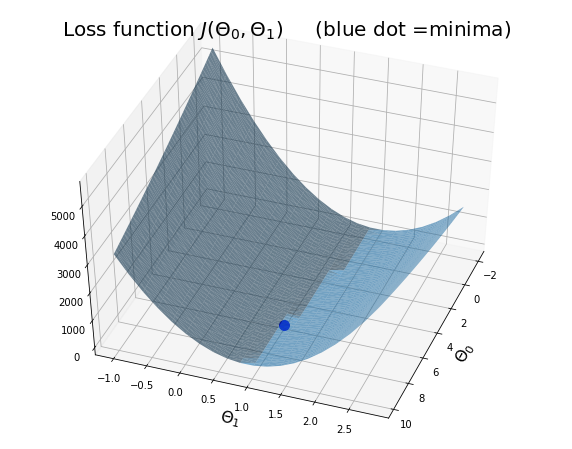

In [ ]:
#Plot the cost function
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# theta0,theta1 at which we want to plot our cost function
theta0data = np.arange(-2,10,0.2)
theta1data = np.arange(-1,3,0.2)
theta0data, theta1data = np.meshgrid(theta0data, theta1data)
t0f = theta0data.flatten()
t1f = theta1data.flatten()
# evaluate the cost function at our points
costs = np.array([J([t0f[j],t1f[j]]) for j in range(len(t0f))])
#plot the cost function as a triangulated surface
ax.plot_trisurf(t0f,t1f,costs, alpha=0.6)
ax.scatter([t0],[t1],[J([t0,t1])], s=100,c="#0000ff")
ax.view_init(45, 20)

plt.title("Loss function $J(\Theta_0, \Theta_1)$     (blue dot =minima)", fontsize =20)
plt.xlabel("$\Theta_0$", fontsize=16)
plt.ylabel("$\Theta_1$", fontsize=16)
plt.show()


**(Batch) Gradient Descent**

The gradient of $J$ is defined by 

\begin{align*}
\nabla J(\theta)  = \begin{pmatrix}\frac{\partial}{\partial \theta_0} J(\theta) \\ \frac{d\partial}{\partial \theta_1} J(\theta)  \\ \vdots \\ \frac{\partial}{\partial \theta_d} J(\theta) \end{pmatrix}
\end{align*}

For $i=0,...,d$ the entry $\frac{d\partial}{\partial \theta_i} J(\theta)$ is given by 
\begin{align*}
\frac{d\partial}{\partial \theta_i} J(\theta) = \sum_{j=1}^n (h_{\theta}(x^{(j)}) - y^{(j)})\, x^{(j)}_i .
\end{align*}

We consider the special case $d=1$, i.e. we have $\theta = (\theta_0 , \theta_1)$ and 

\begin{align*}
\nabla J(\theta_0 , \theta_1)  = \begin{pmatrix}\frac{\partial}{\partial \theta_0} J(\theta_0 , \theta_1) \\ \frac{d\partial}{\partial \theta_1} J(\theta_0 , \theta_1)  \end{pmatrix} = \begin{pmatrix}  \sum_{j=1}^n (h_{\theta}(x^{(j)}) - y^{(j)}) \\  \sum_{j=1}^n (h_{\theta}(x^{(j)}) - y^{(j)})\, x^{(j)} \end{pmatrix} \,.
\end{align*}

(Here we used the convention $x^{(j)}_0 =1$ and we treat $x^{(j)}$ not as a vector but just as the single feature we have in our training set). 

In [ ]:
# Training set
Tx = np.array([2, 7, 13, 16, 22, 27])    
Ty = np.array([5, 20, 14, 32, 22, 38])

# The (normalized) gradient for at a theta
def gradient(theta):
  g=np.array([0,0])
  for j in range(n):
    g[0]+= h(theta,[1,Tx[j]]) - Ty[j]
    g[1]+= (h(theta,[1,Tx[j]]) - Ty[j])*Tx[j]
  return(g/np.linalg.norm(g))

In [ ]:
gradient([0,0])

array([-0.05556399, -0.99845513])

For a learning rate $\alpha$ the gradient descent update rule is given by 
\begin{align*}
	\theta &:= \theta - \alpha \nabla J(\theta) \\
  &= \theta + \alpha \sum_{j=1}^n (y^{(j)} - h_{\theta}(x^{(j)}))\, x^{(j)} \,.
\end{align*}



In [ ]:
# Start with some value for theta
theta=[0,0]

listt0 = np.array([])
listt1 = np.array([])

# learning rate
alpha=0.1

# number of steps
steps = 2000

# gradient descent 
for s in range(steps):
  listt0 = np.append(listt0,theta[0])  # save data for drawing
  listt1 = np.append(listt1,theta[1])
  theta = theta - alpha*gradient(theta)

print("Gradient descent gives after",steps,"steps: ", theta)
print("Best theta: ", [t0,t1])

Gradient descent gives after 2000 steps:  [6.18655233 1.14586109]
Best theta:  [6.489328676755913, 1.0582072176949942]


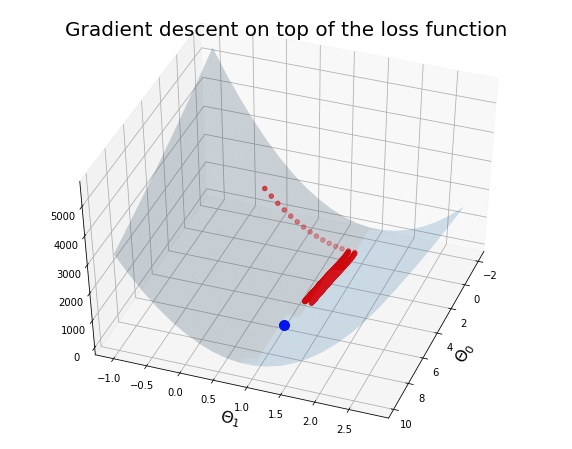

In [ ]:
#Plot the cost function & Gradient descent
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# theta0,theta1 at which we want to plot our cost function
theta0data = np.arange(-2,10,0.2)
theta1data = np.arange(-1,3,0.2)
theta0data, theta1data = np.meshgrid(theta0data, theta1data)
t0f = theta0data.flatten()
t1f = theta1data.flatten()
# evaluate the cost function at our points
costs = np.array([J([t0f[j],t1f[j]]) for j in range(len(t0f))])
costatdescent = np.array([J([listt0[j],listt1[j]]) for j in range(len(listt0))])

#plot the cost function as a triangulated surface
ax.plot_trisurf(t0f,t1f,costs,alpha = 0.2)
ax.scatter(listt0,listt1,costatdescent, c="#ff0000")
ax.scatter([t0],[t1],[J([t0,t1])], s=100,c="#0000ff")

plt.title("Gradient descent on top of the loss function", fontsize =20)
plt.xlabel("$\Theta_0$", fontsize=16)
plt.ylabel("$\Theta_1$", fontsize=16)
ax.view_init(45, 20)

plt.show()



---


# **Using Linear Algebra to find the Thetas**

The "best" solution of a linear system $A \theta = y$ is given by the solution of $(A^T A) \theta = A^T y$, i.e. 
$$ \theta = (A^T A)^{-1} A^T y\,.$$
This solution for $\theta$ minimizes $||A\theta - y||$.



**Example:**
\begin{align*}
A = \begin{pmatrix} 1 & 1 \\ 1 & 2 \\ 1 & 3 \end{pmatrix}\,\quad y = \begin{pmatrix} 3 \\ 0 \\ 0 \end{pmatrix}
\end{align*}

The linear system $A \theta = y$ has no solutions $\theta \in \mathbb{R}^2$.

In [385]:
A=np.matrix([[1,1],
             [1,2],
             [1,3]])

y=np.array([[3,0,0]]).transpose()

theta=np.linalg.inv(A.transpose().dot(A)).dot(A.transpose()).dot(y)
print("Best solution for theta: ", theta.transpose())
print("Orthogonal projection of ", y.transpose(), "onto the image of A: ", A.dot(theta).transpose())


Best solution for theta:  [[ 4.  -1.5]]
Orthogonal projection of  [[3 0 0]] onto the image of A:  [[ 2.5  1.  -0.5]]


So $\theta = \begin{pmatrix} 4 \\ -\frac{3}{2} \end{pmatrix}$ minimizes $|| A\theta - y ||$. 

In [372]:

# Applying it to our Tebasaki example
A=np.array([[1,2],
            [1,7],
            [1,13],
            [1,16],
            [1,22],
            [1,27]])

y=np.array([5, 20, 14, 32, 22, 38])

print("Theta direct solution (using linalg.solve): ", np.linalg.solve(A.transpose().dot(A), A.transpose().dot(y)))
print("Theta direct solution (using inverse): ", np.linalg.inv(A.transpose().dot(A)).dot(A.transpose()).dot(y))

Theta direct solution (using linalg.solve):  [6.48932868 1.05820722]
Theta direct solution (using inverse):  [6.48932868 1.05820722]
